<a href="https://colab.research.google.com/github/Arju-Jawla/Work-on-Significant-Wave-Height-data-for-2022-and-23/blob/main/SWH(22_23)_06_monmean_to_seasonalmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Required Libraries

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load the Monthly Mean Data

In [ ]:
# Load the monthly mean NetCDF file
ds_monthly = xr.open_dataset('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_monthly_mean_22_23.nc')

In [ ]:
# Inspect the dataset
print(ds_monthly)

<xarray.Dataset> Size: 25MB
Dimensions:     (longitude: 720, latitude: 361, valid_time: 24)
Coordinates:
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * valid_time  (valid_time) datetime64[ns] 192B 2022-01-31 ... 2023-12-31
    number      int32 4B ...
Data variables:
    swh         (valid_time, latitude, longitude) float32 25MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-07T06:55 GRIB to CDM+CF via cfgrib-0.9.1...


## 3. Group by Seasons
use the groupby() method with valid_time.season to group the data into seasons.

* DJF: December, January, February
* MAM: March, April, May
* JJA: June, July, August
* SON: September, October, November

In [ ]:
# Shift valid_time by one month
ds_monthly['valid_time'] = xr.DataArray(
    ds_monthly['valid_time'].to_index() + pd.DateOffset(months=1),
    dims='valid_time'
)

# Regroup and calculate seasonal means
ds_seasonal_aligned = ds_monthly.groupby('valid_time.season').mean()

# Check the seasonal data
print(ds_seasonal_aligned)

<xarray.Dataset> Size: 4MB
Dimensions:    (season: 4, latitude: 361, longitude: 720)
Coordinates:
  * longitude  (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude   (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
    number     int32 4B 0
  * season     (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    swh        (season, latitude, longitude) float32 4MB nan nan nan ... nan nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-07T06:55 GRIB to CDM+CF via cfgrib-0.9.1...


## 4. Split Data into Seasonal Files

In [ ]:
# Save DJF data
ds_seasonal_aligned.sel(season='DJF').to_netcdf('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_DJFmean_22_23.nc')

# Save MAM data
ds_seasonal_aligned.sel(season='MAM').to_netcdf('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_MAMmean_22_23.nc')

# Save JJA data
ds_seasonal_aligned.sel(season='JJA').to_netcdf('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_JJAmean_22_23.nc')

# Save SON data
ds_seasonal_aligned.sel(season='SON').to_netcdf('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_SONmean_22_23.nc')

print("Seasonal files saved successfully.")

Seasonal files saved successfully.


## 5. Verify Seasonal Data

In [ ]:
# Validate non-null values for each season
non_null_counts = ds_seasonal_aligned['swh'].count(dim=['latitude', 'longitude'])
print("Non-null counts for each season:")
print(non_null_counts)

Non-null counts for each season:
<xarray.DataArray 'swh' (season: 4)> Size: 32B
array([151696, 150471, 148209, 149621])
Coordinates:
    number   int32 4B 0
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'


### 5.1 Seasonal Plots

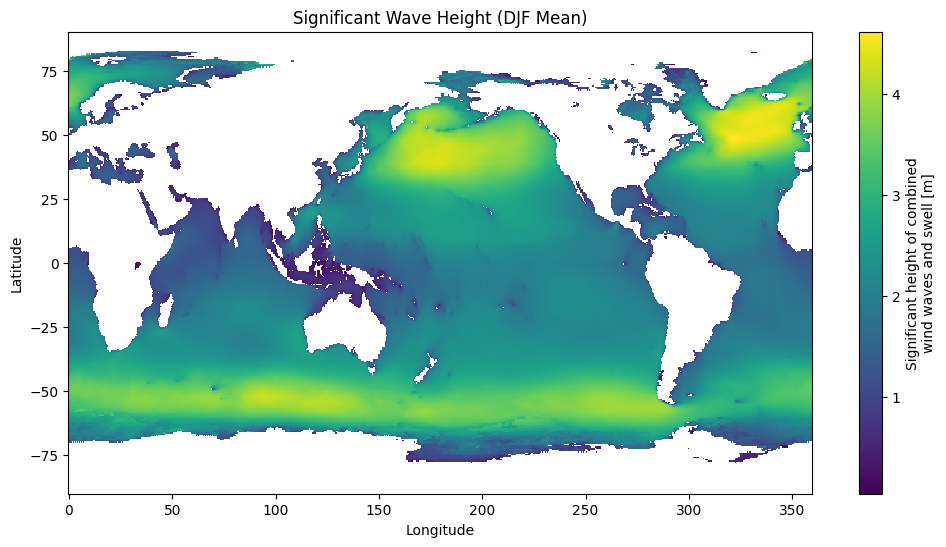

In [ ]:
# Plot spatial data for DJF
djf_data = ds_seasonal_aligned.sel(season='DJF')

plt.figure(figsize=(12, 6))
djf_data['swh'].plot(cmap='viridis', add_colorbar=True)
plt.title("Significant Wave Height (DJF Mean)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

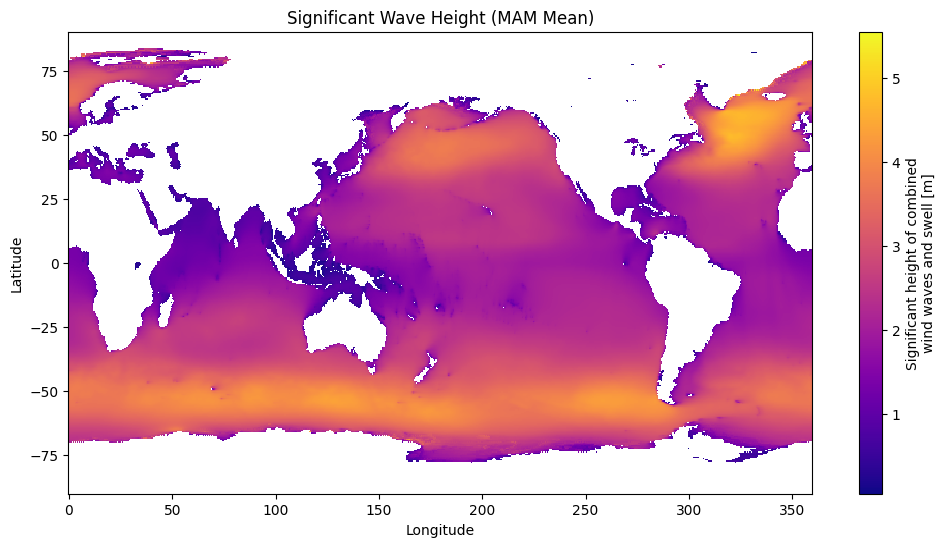

In [ ]:
# Plot spatial data for MAM
mam_data = ds_seasonal_aligned.sel(season='MAM')

plt.figure(figsize=(12, 6))
mam_data['swh'].plot(cmap='plasma', add_colorbar=True)
plt.title("Significant Wave Height (MAM Mean)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

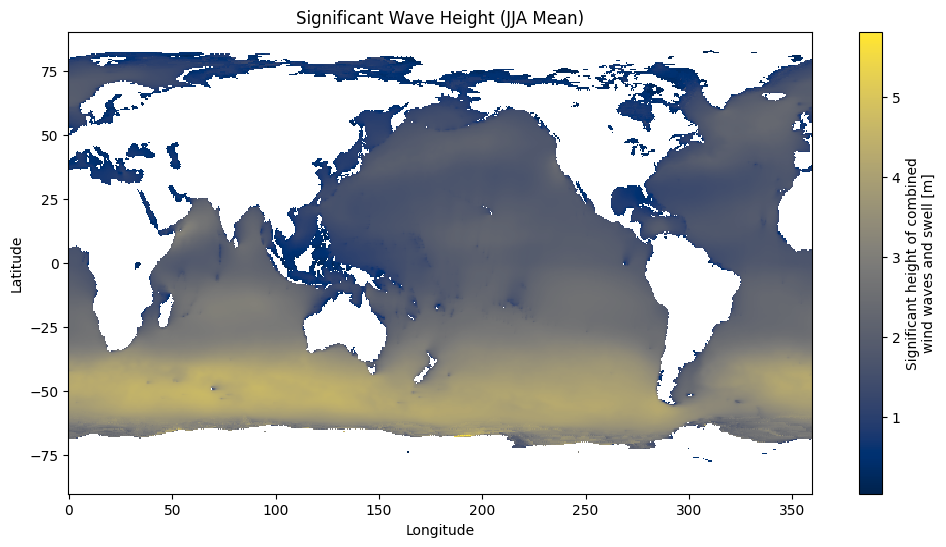

In [ ]:
# Plot spatial data for JJA
jja_data = ds_seasonal_aligned.sel(season='JJA')

plt.figure(figsize=(12, 6))
jja_data['swh'].plot(cmap='cividis', add_colorbar=True)
plt.title("Significant Wave Height (JJA Mean)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

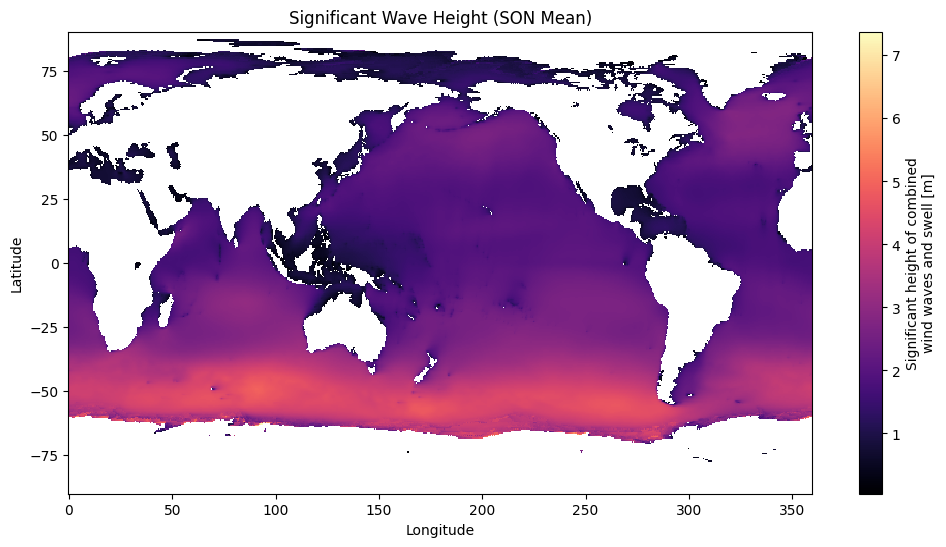

In [ ]:
# Plot spatial data for SON
son_data = ds_seasonal_aligned.sel(season='SON')

plt.figure(figsize=(12, 6))
son_data['swh'].plot(cmap='magma', add_colorbar=True)
plt.title("Significant Wave Height (SON Mean)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

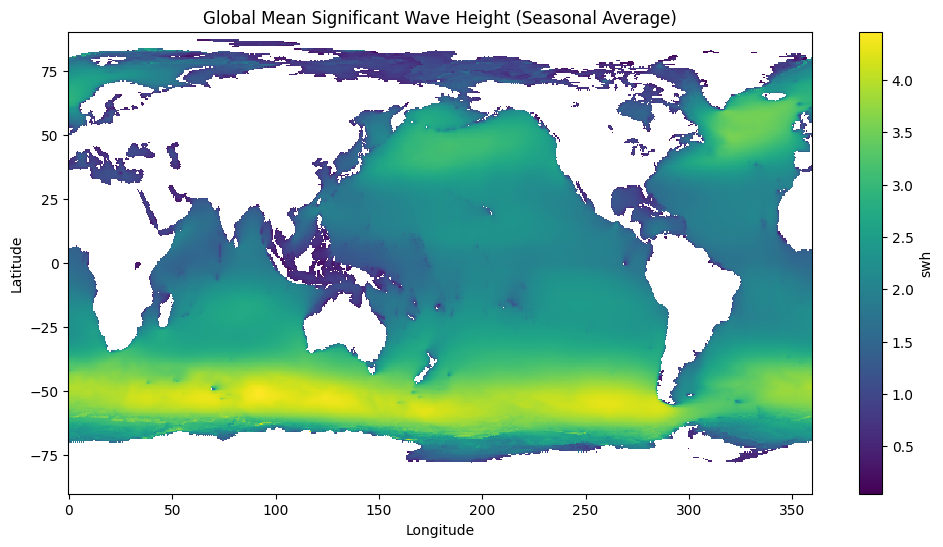

In [ ]:
# Generate a global map of mean significant wave height across all seasons
global_mean = ds_seasonal_aligned['swh'].mean(dim='season')

plt.figure(figsize=(12, 6))
global_mean.plot(cmap='viridis', add_colorbar=True)
plt.title("Global Mean Significant Wave Height (Seasonal Average)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### 5.2 Contour Plots

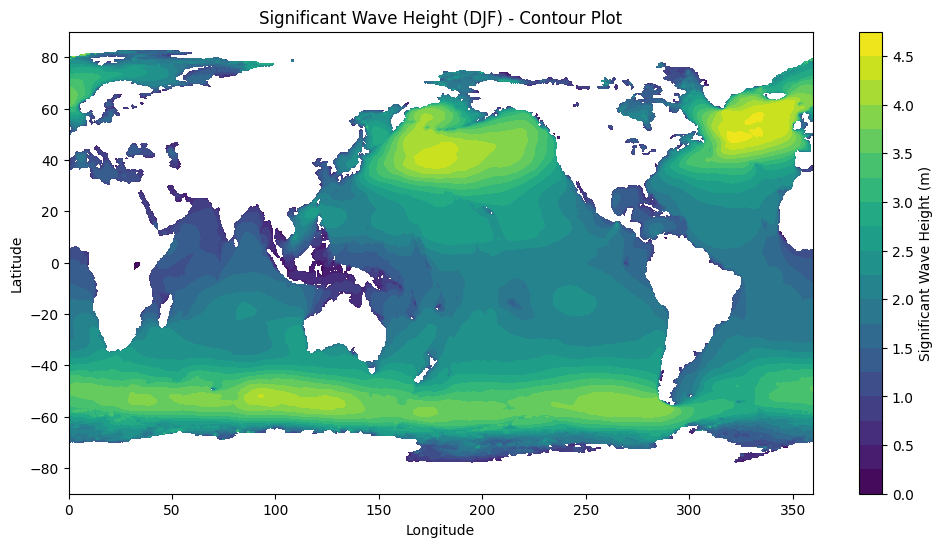

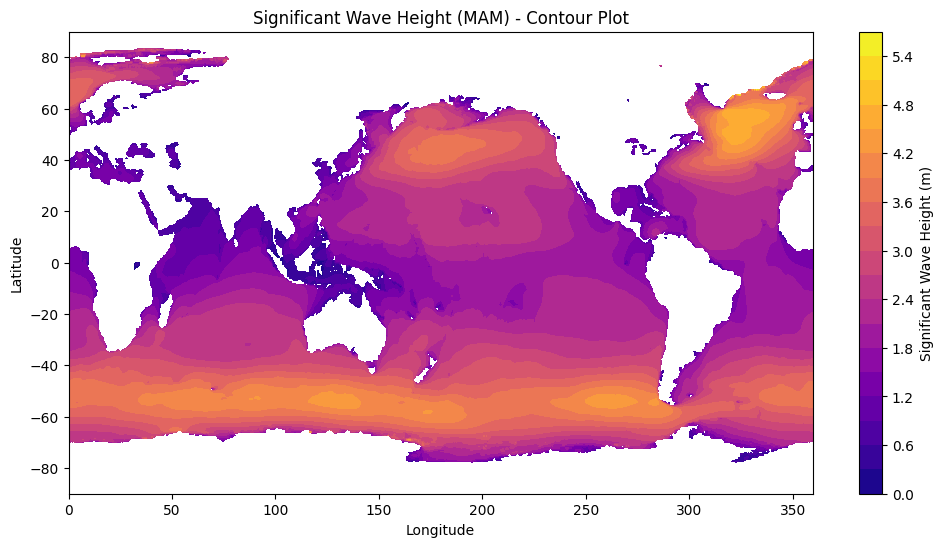

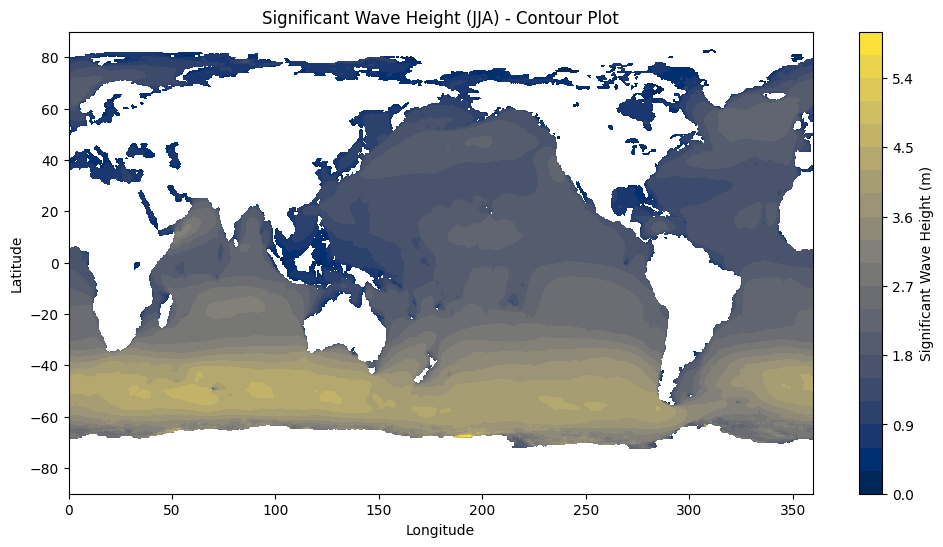

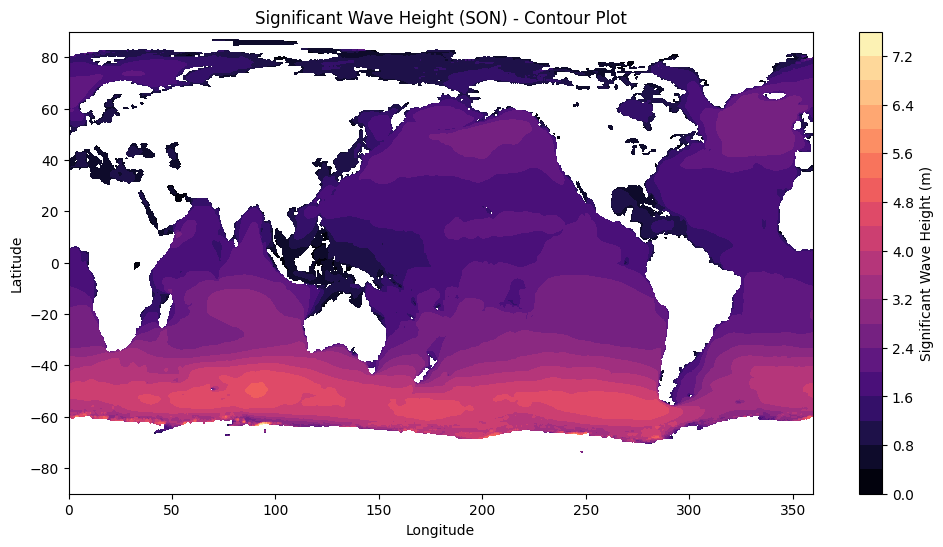

In [ ]:
# Define a function to create contour plots for each season
def plot_contour(data, season, cmap='viridis'):
    plt.figure(figsize=(12, 6))
    contour = plt.contourf(data['longitude'], data['latitude'], data['swh'], cmap=cmap, levels=20)
    plt.colorbar(contour, label="Significant Wave Height (m)")
    plt.title(f"Significant Wave Height ({season}) - Contour Plot")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Plot contour for DJF
djf_data = ds_seasonal_aligned.sel(season='DJF')
plot_contour(djf_data, "DJF", cmap='viridis')

# Plot contour for MAM
mam_data = ds_seasonal_aligned.sel(season='MAM')
plot_contour(mam_data, "MAM", cmap='plasma')

# Plot contour for JJA
jja_data = ds_seasonal_aligned.sel(season='JJA')
plot_contour(jja_data, "JJA", cmap='cividis')

# Plot contour for SON
son_data = ds_seasonal_aligned.sel(season='SON')
plot_contour(son_data, "SON", cmap='magma')
